# Project 3 - Binary Logistic Model

   Introduction: The data set that I am using is sourced originally from kaggle and is a list of the top songs from 2019: https://www.kaggle.com/datasets/leonardopena/top50spotify2019. I adapted this dataset for use in this project by adding the "Pop Or Not?" Column. I determined whether the song was pop or not by checking whether the song category had the string "pop" in it or not. The prediction that the models will need to make is determining whether a song is pop or not based on several variables sourced directly from spotify. These variables are Beats.Per.Min, Energy, Danceability, Loudness.DB, Liveness, Valence, Length, Acoutiness, Speechiness, Popularity.  

## Load Data

In [116]:
top50 <- read.csv("top50.csv")
#attach(top50)

In [117]:
#top50

In [118]:
require(ggplot2)
require(ggiraph)
require(plyr)
#require(predict3d)
#install.packages("predict3d")

## Single:

I am choosing to use speechiness as my predictor as it sounds like a fun variable! 

#### a) 

In [119]:
pop.glm <- glm(Pop.or.Not. ~ Speechiness, family = binomial) 
summary(pop.glm) 


Call:
glm(formula = Pop.or.Not. ~ Speechiness, family = binomial)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.337  -1.092  -1.054   1.243   1.306  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.36546    0.43144  -0.847    0.397
Speechiness  0.02291    0.02618   0.875    0.382

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 69.235  on 49  degrees of freedom
Residual deviance: 68.451  on 48  degrees of freedom
AIC: 72.451

Number of Fisher Scoring iterations: 4


#### b)

In [120]:
b0 <- coef(pop.glm)[1] 
b1 <- coef(pop.glm)[2] 
pi = exp(b0+b1)/(1+exp(b0+b1))
pi

(Intercept) 
  0.4151908

On average a song with x speechiness would have 0.4152 probability of being pop. Also, as you can see above, the P value for the speechiness test is 0.382 which isn't statistically significant. 

In [121]:
odds = pi/(1-pi)
odds

(Intercept) 
  0.7099593

For every 1 increase in speechiness the odds increases by 0.71. 

#### c)

In [122]:
confint(pop.glm) 
exp(confint(pop.glm)) 

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-1.23108888,0.47467438
Speechiness,-0.02770365,0.07725207


Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),0.2919745,1.607491
Speechiness,0.9726766,1.080314


1 is contained within my odds ratio. If the odds ratio for a predictor is equal to 1 that means that there is no association between the predictor and the outcome. If a 95% confidence interval contains 1 then my results aren't statistically significant.

#### d)

Ok, let's try to predict whether the song is pop or not based on a speechiness value of 5. 

In [123]:
b0 <- coef(pop.glm)[1] 
b1 <- coef(pop.glm)[2] 
pi = exp(b0+b1*5)/(1+exp(b0+b1*5))
pi

(Intercept) 
  0.4376001

Alright, so that means that the song with a speechiness value of 5 has been predicted to be not pop as the value of pi is less than 0.5

Let's try to predict whether the song is pop or not based on a speechiness value of 50. 

In [124]:
b0 <- coef(pop.glm)[1] 
b1 <- coef(pop.glm)[2] 
pi = exp(b0+b1*50)/(1+exp(b0+b1*50))
pi

(Intercept) 
  0.6856886

Alright, the song with a speechiness value of 50 has been predicted to be pop as the value of pi is greater than 0.5

Let's try one more. Given a speechiness of 90, what does the model predict?

In [125]:
b0 <- coef(pop.glm)[1] 
b1 <- coef(pop.glm)[2] 
pi = exp(b0+b1*90)/(1+exp(b0+b1*90))
pi

(Intercept) 
  0.8450688

The model predicts that the song is pop as the value of pi is greater than 0.5.

#### e)

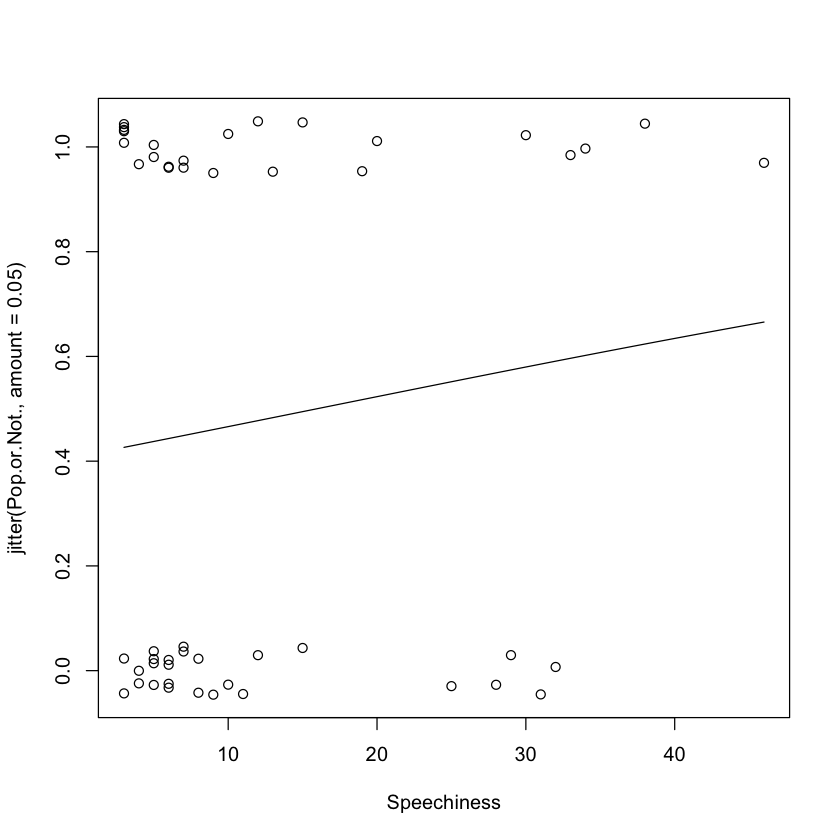

In [126]:
b0 <- coef(pop.glm)[1] 
b1 <- coef(pop.glm)[2] 
plot(Speechiness, jitter(Pop.or.Not., amount = 0.05)) 
  curve(exp(b0+b1*x)/(1+exp(b0+b1*x)),add=TRUE) 

Well, clearly this model is not doing a very good job and predicting very much at all... I think that's just because the variable in general is not very good for predicting what I need. 

#### f)

In [127]:
G <- 69.235 - 68.451
df <- 49 - 48 
G 

[1] 0.784

In [128]:
pchisq(G, df, lower.tail=F) 

[1] 0.3759206

The G statistic as seen above is 0.784. This p-value is not significant, meaning that our model is not significant either. 

## Multiple:

#### a)

In [129]:
pop.glm2 <- glm(Pop.or.Not. ~ Speechiness + Popularity, family = binomial) 

In [130]:
summary(pop.glm2)


Call:
glm(formula = Pop.or.Not. ~ Speechiness + Popularity, family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8253  -0.9793  -0.5898   0.9978   1.7691  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) 20.39689    8.28809   2.461   0.0139 *
Speechiness  0.04767    0.03017   1.580   0.1141  
Popularity  -0.24033    0.09546  -2.518   0.0118 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 69.235  on 49  degrees of freedom
Residual deviance: 59.602  on 47  degrees of freedom
AIC: 65.602

Number of Fisher Scoring iterations: 4


In [131]:
pop.glm3 <- glm(Pop.or.Not. ~ Speechiness + Popularity + Liveness, 
                family = binomial) 

In [132]:
summary(pop.glm3)


Call:
glm(formula = Pop.or.Not. ~ Speechiness + Popularity + Liveness, 
    family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8378  -0.9689  -0.5750   0.9724   1.6950  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) 20.11904    8.29089   2.427   0.0152 *
Speechiness  0.04479    0.03043   1.472   0.1410  
Popularity  -0.23420    0.09583  -2.444   0.0145 *
Liveness    -0.01521    0.02971  -0.512   0.6088  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 69.235  on 49  degrees of freedom
Residual deviance: 59.329  on 46  degrees of freedom
AIC: 67.329

Number of Fisher Scoring iterations: 4


In [133]:
pop.glm4 <- glm(Pop.or.Not. ~ Popularity + Liveness, family = binomial) 
summary(pop.glm4)


Call:
glm(formula = Pop.or.Not. ~ Popularity + Liveness, family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8543  -0.9831  -0.6771   1.0740   1.8093  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) 17.57309    7.86964   2.233   0.0255 *
Popularity  -0.19761    0.08943  -2.210   0.0271 *
Liveness    -0.02204    0.02867  -0.769   0.4421  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 69.235  on 49  degrees of freedom
Residual deviance: 61.653  on 47  degrees of freedom
AIC: 67.653

Number of Fisher Scoring iterations: 4


In [134]:
pop.glm5 <- glm(Pop.or.Not. ~ Popularity + Loudness.dB, data=top50, 
                family = binomial) 
summary(pop.glm5)


Call:
glm(formula = Pop.or.Not. ~ Popularity + Loudness.dB, family = binomial, 
    data = top50)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8849  -0.8945  -0.5134   1.0098   1.7858  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) 16.44625    7.99283   2.058   0.0396 *
Popularity  -0.21364    0.09151  -2.335   0.0196 *
Loudness.dB -0.38631    0.17199  -2.246   0.0247 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 69.235  on 49  degrees of freedom
Residual deviance: 56.271  on 47  degrees of freedom
AIC: 62.271

Number of Fisher Scoring iterations: 4


In [135]:
pop.glm6 <- glm(Pop.or.Not. ~ Popularity + Loudness.dB + Beats.Per.Minute, 
                family = binomial) 
summary(pop.glm6)


Call:
glm(formula = Pop.or.Not. ~ Popularity + Loudness.dB + Beats.Per.Minute, 
    family = binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8508  -0.9324  -0.4946   1.0219   1.6244  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)  
(Intercept)      16.825455   8.147005   2.065   0.0389 *
Popularity       -0.227999   0.096079  -2.373   0.0176 *
Loudness.dB      -0.395795   0.175791  -2.252   0.0244 *
Beats.Per.Minute  0.006879   0.010643   0.646   0.5181  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 69.235  on 49  degrees of freedom
Residual deviance: 55.853  on 46  degrees of freedom
AIC: 63.853

Number of Fisher Scoring iterations: 4


I think that the best model that I've encountered after these trials is the one based on Popularity and Loudness.dB. I will use that one going forward with this project.

#### b)

Ok, so let's assume I'm attempting to predict pop.or.not given a value of 77 for popularity and 12 for Loudness.dB.

In [136]:
b0 <- coef(pop.glm5)[1] 
b1 <- coef(pop.glm5)[2] 
b2 <- coef(pop.glm5)[3] 
predicted_pi = pi = exp(b0+b1*77+b2*12)/(1+exp(b0+b1*77+b2*12))
predicted_pi

(Intercept) 
0.009568121

Predicted_pi is less than 0.5 so, this made up song is predicted by the model to be not pop. 

#### c)

In [137]:
# G - test function, so we only write the code for the test once 
Gtest <- function(model) { 
  #  
  # Inputs: Null Devance, Residual Deviance, Null df, Residual df 
  # Outputs: G test statistic, DF, and P-value  
  # ToDO: Add test for to check if the model approproate for a G test! 
  
  if((summary(model)$family[1] == "binomial")) { 
    n <- length(anova(model)[,1]) 
    null.deviance <- anova(model)[1,4]     
    residual.deviance <- anova(model)[n,4]    
    null.df <- anova(model)[1,3] 
    residual.df <- anova(model)[n,3] 
     
    G <- null.deviance - residual.deviance 
    df <- null.df - residual.df 
    p <- pchisq(G, df, lower.tail=F) 
     
    cat("G =", G, "DF =", df, "P-value =", p) 
       
    } else { 
  stop("This is not a logistic model!")   
  }   
} 

In [138]:
Gtest(pop.glm5)

G = 12.96397 DF = 2 P-value = 0.001530765

So both the popularity and Loudness.dB are much better predictors than the Speechiness I chose in the Single model. Both Popularity and Loudness.dB are statistically significant as can be seen in the summary in part A. The G test above also produced a statistically significant result!

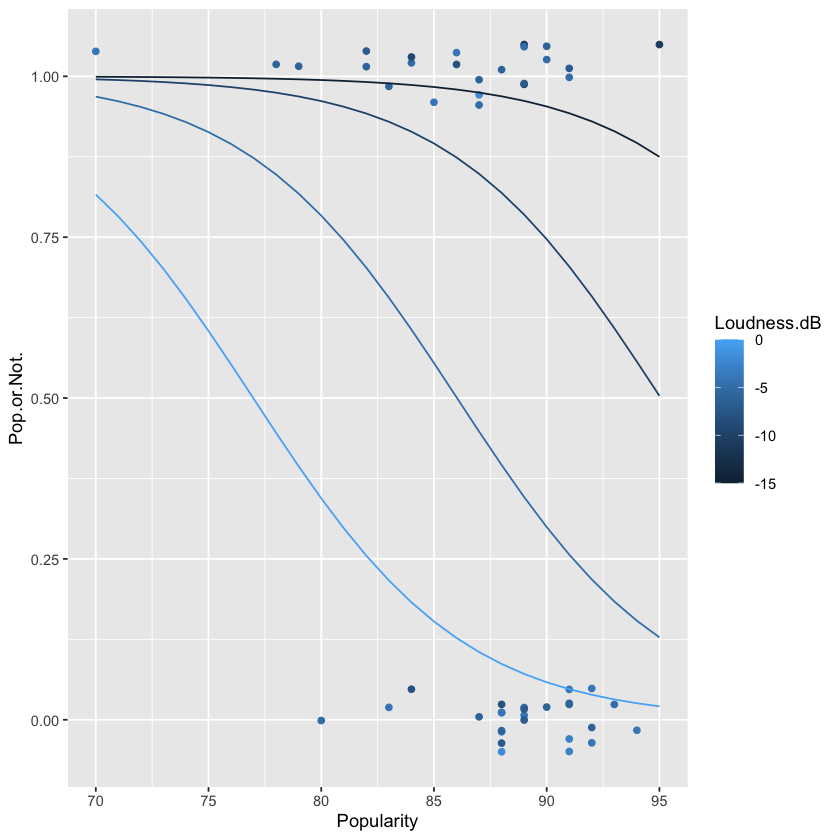

In [139]:
require(ggiraphExtra)
ggPredict(pop.glm5)

I found this really nice visualization tool online for visualizing multiple regression models. I'm not sure if there are any other simpler techniques for visualizing both variables on the same graph. 

## Prediction Table

#### a)

In [140]:
top50$Predicted <- fitted(pop.glm5) 
length(top50$Predicted) 

[1] 50

#### b)

In [141]:
pop <- top50 
pop$Predicted <- 0 
pop$Predicted[top50$Predicted > 0.5] <- 1 
pop$Predicted 

[1] 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0
[39] 1 1 1 0 1 1 0 0 0 0 0 1

In [142]:
top50$Pop.or.Not

[1] 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1
[39] 0 1 0 1 1 1 0 0 0 0 0 1

#### c)

In [143]:
tab = table(top50$Pop.or.Not, pop$Predicted)
row.names(tab) <- c("Actual Pop", "Actual Not Pop")
colnames(tab) <- c("Predicted Pop", "Predicted Not Pop")
tab

                
                 Predicted Pop Predicted Not Pop
  Actual Pop                18                 8
  Actual Not Pop            10                14

#### d)

As you can see above, the model wasn't totally accurate. There was a good amount of values that were predicted correctly according to the model. However, 18/50 values were predicted incorrectly. That's pretty close to half, meaning are model is better than average, but not very much better.

### Conclusion:

In conclusion, none of the variables worked exceptionally well in predicting whether the song was pop or not, which, honestly, I was expecting. Lots of these variables are entirely subjective... the danceability or speechiness of a song are really weird variables to measure in the first place. Even slightly more concrete ones like popularity and loudness in decibels weren't really able to help me determine whether the song was pop or not as pop is kind of a subjective classification as well. Anyway, this was still super fun!